In [1]:
import pandas as pd
import numpy as np

#  Bitly Data from USA.gov

In 2011, URL shortening service Bitly partnered with the US government to provide a feed of anon data gathered from users who shorten links ending with .gov or .mil

A live feed as well as hourly snapshots were available to download as text files, in the case of hourly snapshots, each line in each file contains a common form of web data known as JSON

In [2]:
path = 'example.txt'

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
# There are built-in Python tools for help in converting JSON string into a Python dictionary

import json
with open(path) as f:
    records = [json.loads(line) for line in f]
    
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

###  Counting Time Zones in Python

We could find the time zones that occur most often in the dataset, lets start by extracting a list of time zones using a list comprehension

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:20]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta']

In [8]:
# we have two ways to return a count now, manually or pandas built in

# 1) Use Dict to store counts while iterating time zones

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [11]:
counts = get_counts(time_zones)

In [10]:
# 2) Advanced Tools in Python Library

from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

get_counts2(time_zones)['America/New_York']

1251

In [12]:
# Say you wanted to find top 10 time zones and their counts

def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs [-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [13]:
# Python Standard Libray has collections.Counter tool which makes this even easier

from collections import Counter

counts = Counter(time_zones)

counts.most_common(15)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20)]

### Counting Time Zones with Pandas

In [15]:
frame = pd.DataFrame(records)

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [16]:
tz_counts = frame['tz'].value_counts()

tz_counts.head(10) # much simpler

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [17]:
# can also clean up for visualizations

clean_tz = frame['tz'].fillna('Missing')

clean_tz[clean_tz == ""] = 'Unknown'

tz_counts = clean_tz.value_counts()

tz_counts.head(10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

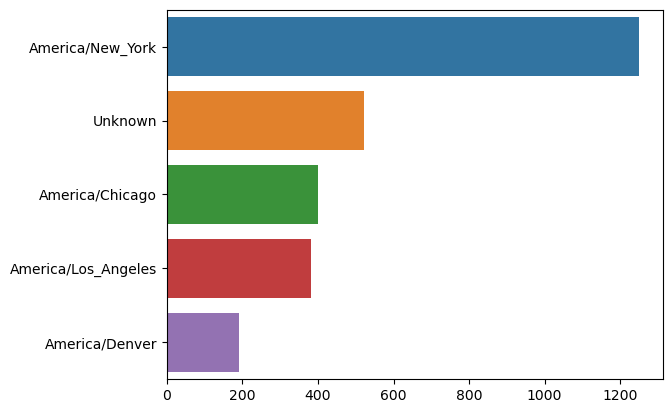

In [18]:
import seaborn as sns

subset = tz_counts.head()

sns.barplot(y = subset.index, x = subset.to_numpy());

In [23]:
# fields 'a' contains records about broswer, device, and applications used to perform the URL shortening

frame['a'][1]

'GoogleMaps/RochesterNY'

In [24]:
frame['a'][48]

'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:9.0.1) Gecko/20100101 Firefox/9.0.1'

In [25]:
frame['a'][51][:50] # long line, grabs first 50 characters

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [26]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])

results.head(10)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [27]:
# get value counts of this agent attribute

results.value_counts().head(10)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [28]:
# now lets summarize counts of operating systems (Windows or Not Windows)

cframe = frame[frame['a'].notna()].copy()

In [29]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')

cframe['os'].head(10)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
8    Not Windows
9        Windows
Name: os, dtype: object

In [31]:
# You could then group data by time zone and summarize counts of operating systems

by_tz_os = cframe.groupby(['tz', 'os'])

agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [32]:
indexer = agg_counts.sum('columns').argsort()

indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [34]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [35]:
# plotting it

count_subset = count_subset.stack()

count_subset.name = 'total'

count_subset = count_subset.reset_index()

count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


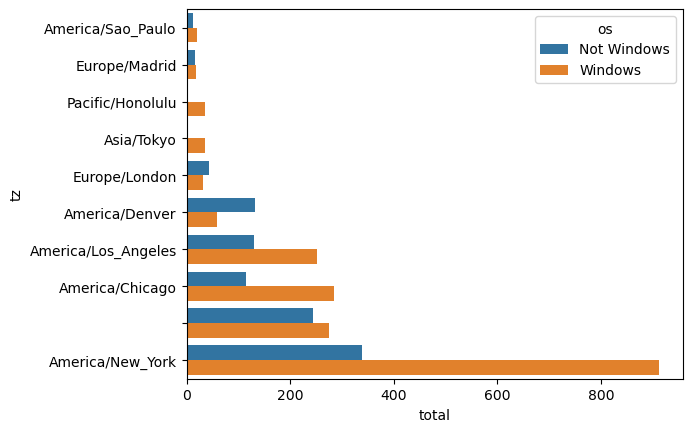

In [36]:
sns.barplot(x = 'total', y = 'tz', hue = 'os', data = count_subset);

## MovieLens 1M Dataset

The data ranges from late 1990s to early 2000s and provides movie ratings, movie metadata (genres and years), and demographic data about the users. This data is of interest in the development of recommendation systems based on machine learning algorithms

In [37]:
# dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. Spread across three tables: ratings,
# user information, and movie information

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep = '::', header = None, names = unames, engine = 'python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep = '::', header = None, names = rnames, engine = 'python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep = '::', header = None, names= mnames, engine = 'python')

users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [38]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
data = pd.merge(pd.merge(ratings, users), movies)

data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [41]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [43]:
# One query you could make is to find mean movie ratings for each film based on gender of the user

mean_ratings = data.pivot_table('rating', index = 'title',
                                columns = 'gender', aggfunc = 'mean')

mean_ratings.head(15)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [44]:
# For accurate anaylsis you would to remove any titles that have lower than a set minimum size (aka too low of a sample)
# for this dataset we could remove movies with 250 or less ratings 

ratings_by_title = data.groupby('title').size()

ratings_by_title.head(20)

title
$1,000,000 Duck (1971)                   37
'Night Mother (1986)                     70
'Til There Was You (1997)                52
'burbs, The (1989)                      303
...And Justice for All (1979)           199
1-900 (1994)                              2
10 Things I Hate About You (1999)       700
101 Dalmatians (1961)                   565
101 Dalmatians (1996)                   364
12 Angry Men (1957)                     616
13th Warrior, The (1999)                750
187 (1997)                               55
2 Days in the Valley (1996)             286
20 Dates (1998)                         139
20,000 Leagues Under the Sea (1954)     575
200 Cigarettes (1999)                   181
2001: A Space Odyssey (1968)           1716
2010 (1984)                             470
24 7: Twenty Four Seven (1997)            5
24-hour Woman (1998)                      9
dtype: int64

In [46]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [48]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [49]:
# you could sort now to see which movies are rated highest among females

top_female_ratings = mean_ratings.sort_values('F', ascending = False)
top_female_ratings.head(15)

gender,F,M,diff
title,,,
"Close Shave, A (1995)",4.644444,4.473795,-0.170650
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,-0.108060
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,-0.178032
Schindler's List (1993),4.562602,4.491415,-0.071187
"Shawshank Redemption, The (1994)",4.539075,4.560625,0.021550
"Grand Day Out, A (1992)",4.537879,4.293255,-0.244624
To Kill a Mockingbird (1962),4.536667,4.372611,-0.164055
Creature Comforts (1990),4.513889,4.272277,-0.241612


### Measuring Rating Disagreement 

In [50]:
# you could create a new column containing the difference between male and female avg ratings, sorting by that column
# will now return movies that are the most divisive between two genders

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sorted_by_diff = mean_ratings.sort_values('diff')

sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [51]:
# you could also do a query to find most disagreements among certain movies. Aka highest variance or standard deviation of
# the ratings

rating_std_by_title = data.groupby('title')['rating'].std()

rating_std_by_title = rating_std_by_title.loc[active_titles]

rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [52]:
# need to sort by value and to find most disagreed upon ratings

rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [53]:
# sometimes movie genres will have multiple genres

movies['genres'].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [54]:
movies['genres'].head().str.split('|')

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [55]:
movies['genre'] = movies.pop('genres').str.split('|')

movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [56]:
# the explode method will create a new DataFrame where there is one row for each 'inner' element. See below:

movies_exploded = movies.explode('genre')

movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [60]:
# you can now merge all three tables and group by genre

ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [62]:
genre_ratings = (ratings_with_genre.groupby(['genre', 'age'])['rating'].mean().unstack('age'))

genre_ratings

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


## US Baby Names 1880-2010

In [1]:
import pandas as pd
import numpy as np

In [2]:
pieces = []
for year in range(1880,2011):
    path = f'babynames/yob{year}.txt'
    frame = pd.read_csv(path, names = ['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)
    

names = pd.concat(pieces, ignore_index = True)

In [3]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)

total_births.tail(10)

sex,F,M
year,,
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


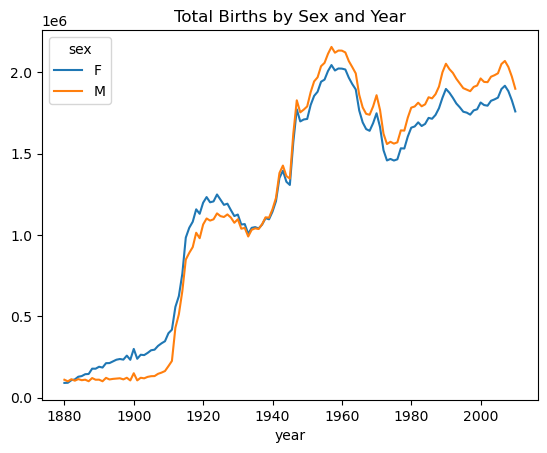

In [5]:
total_births.plot(title = 'Total Births by Sex and Year');

In [6]:
# can find a column prop (probability) .02 would indicate 2 out every 100 babies

def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [7]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [8]:
# when performing operations like this it's useful to execute checks, verifying that prop column = 1 for each group

names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [9]:
# find the top 1,000 names for each sex/year combination

def get_top1000(group):
    return group.sort_values('births', ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])

In [10]:
top1000 = grouped.apply(get_top1000)

top1000.head(10)

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015540
         8     Bertha   F    1320  1880  0.014507
         9      Sarah   F    1288  1880  0.014155

In [11]:
top1000 = top1000.reset_index(drop = True)

In [12]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### Analyzing Naming Trends

In [13]:
boys = top1000[top1000['sex'] == 'M']

girls = top1000[top1000['sex'] == 'F']

In [14]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [15]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


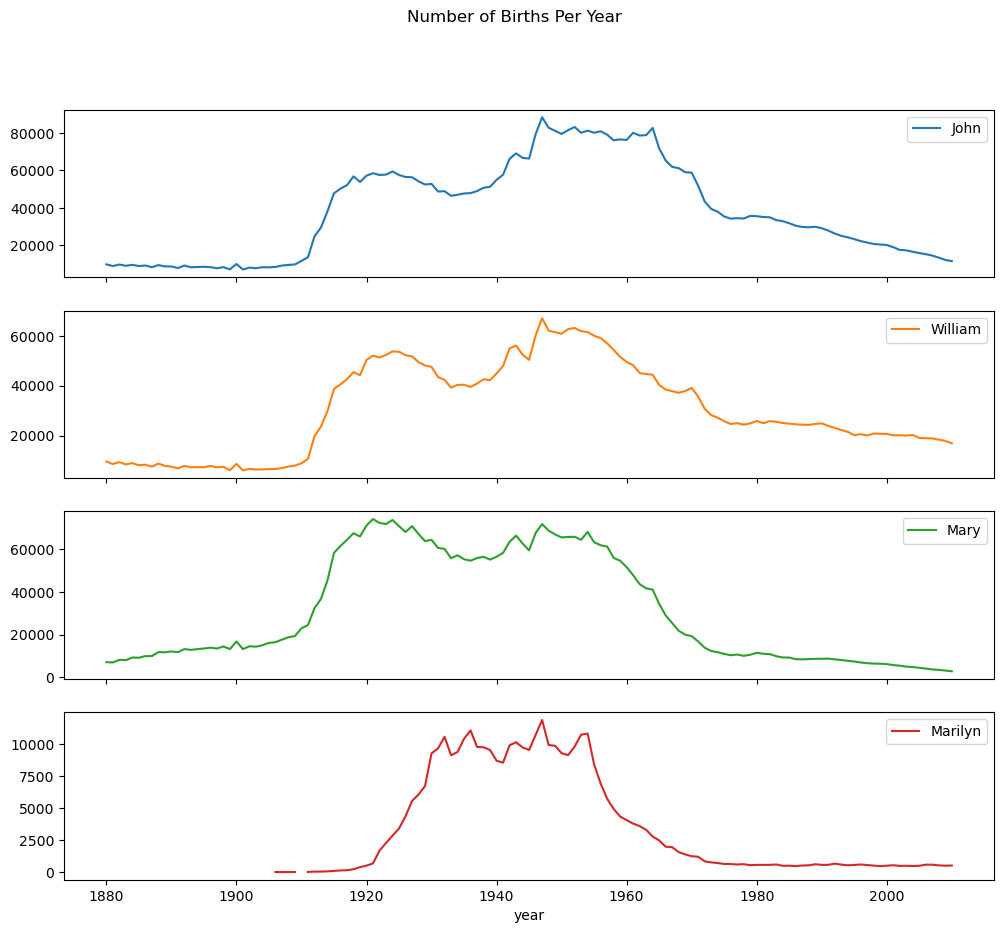

In [23]:
subset = total_births[['John', 'William', 'Mary', 'Marilyn']]

subset.plot(subplots = True, figsize = (12, 10),
            title = 'Number of Births Per Year');

<AxesSubplot: title={'center': 'Sum of top1000.prop by year and sex'}, xlabel='year'>

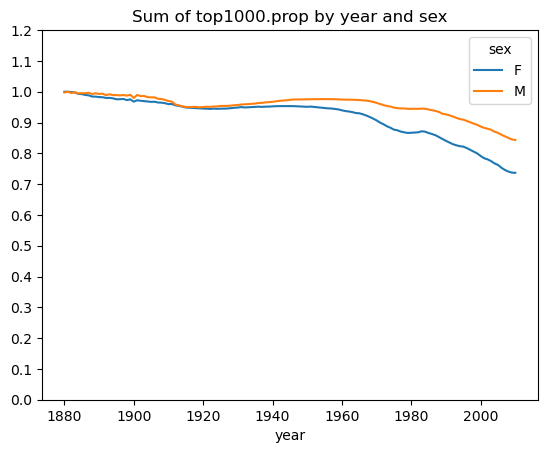

In [24]:
# At first glance it looks like these names have gone out of favor, but need to explore naming variations
# and proportion of births represented by top 1,000 most popular names

table = top1000.pivot_table('prop', index = 'year',
                            columns = 'sex', aggfunc = sum)

table.plot(title = 'Sum of top1000.prop by year and sex',
           yticks = np.linspace(0, 1.2, 13))

In [26]:
df = boys[boys['year'] == 2010]

df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [27]:
prop_cumsum = df['prop'].sort_values(ascending = False).cumsum()

prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [28]:
# you can tell from above that naming variations have increased drastically, another metric to look at would
# be the number of names in the top 50% of births (ie. cumsum of prop column when it reaches .50 and the amount of 
# distinct names in that group)

# need to use the searchsorted() method to return output
prop_cumsum.searchsorted(0.5)

116

In [30]:
# need to add 1 to get correct number of names since arrays are zero-indexed

# lets compare this number to same metric from 1900 to see change in pattern

df = boys[boys.year ==1900]

in1900 = df.sort_values('prop', ascending = False).prop.cumsum()

in1900.searchsorted(.5) + 1

25

In [33]:
# lets apply this to each year/sex combination

def get_quantile_count(group, q = .5):
    group = group.sort_values('prop', ascending = False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack()

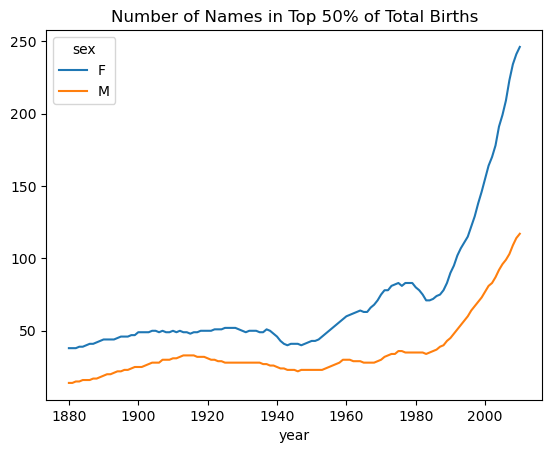

In [35]:
diversity.plot(title = 'Number of Names in Top 50% of Total Births');

In [36]:
# you could also look at variation by last letter, Laura Wattendberg pointed out this metric has changed drastically

def get_lastletter(x):
    return x[-1]

last_letters = names['name'].map(get_lastletter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)

In [37]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')

subtable.head(10)

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0

In [38]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [39]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

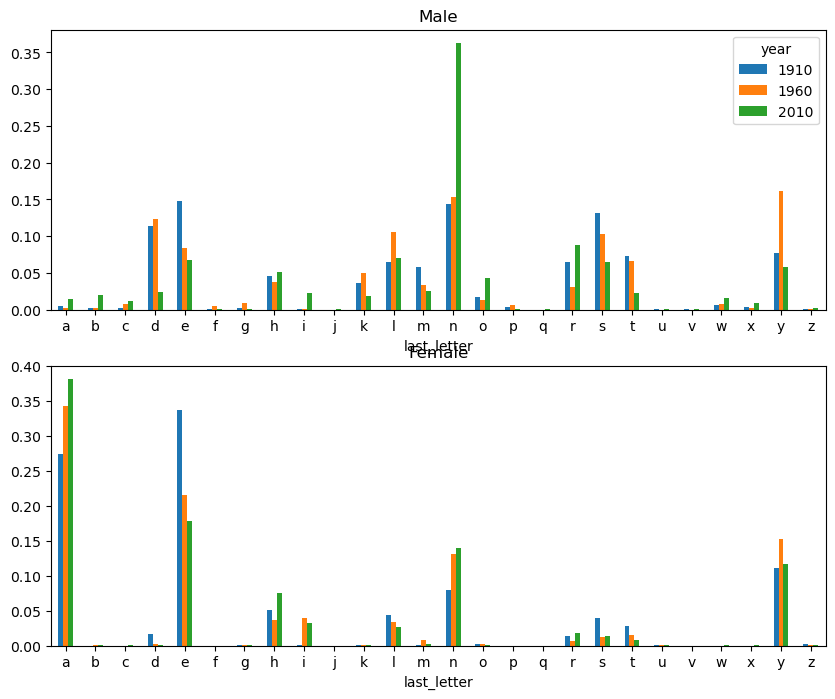

In [41]:
# you could create barplots for each sex, broken down by year

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False);


In [42]:
letter_prop = table/table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

dny_ts.head(15)

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
1885,0.085472,0.146361,0.081882
1886,0.087647,0.149659,0.081681
1887,0.089072,0.148838,0.082870
1888,0.087707,0.151286,0.084919


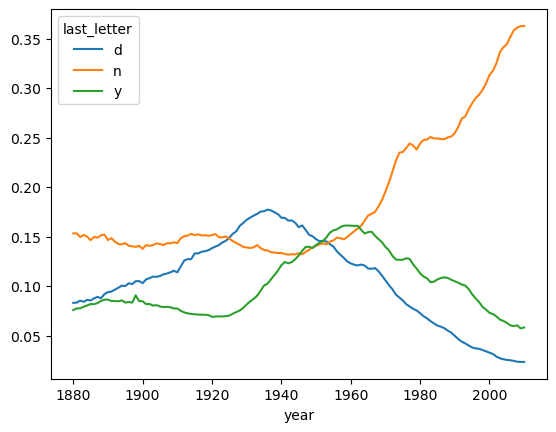

In [44]:
dny_ts.plot();

In [45]:
# another interesting query would be to look at which names changed popularity among genders

all_names = pd.Series(top1000['name'].unique())

lesley_like = all_names[all_names.str.contains('Lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [46]:
# now we can filter down to just those names and sum births grouped by name to see the relative frequencies

filtered = top1000[top1000['name'].isin(lesley_like)]
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [47]:
table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)

table = table.div(table.sum(axis = 'columns'), axis = 'index')
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


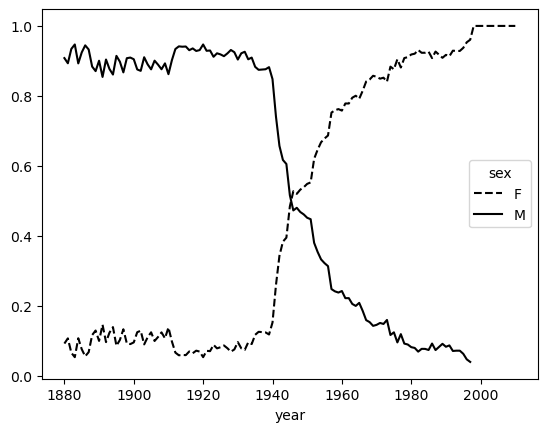

In [48]:
table.plot(style = {'M': 'k-', 'F': 'k--'});

#  2012 Federal Election Comission Database

In [49]:
fec = pd.read_csv('P00000001-ALL.csv', low_memory = False)


In [50]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [51]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [52]:
# a useful column or feature to have would be political party listed as well
# lets do just that, bingo dingo baby

unique_cands = fec['cand_nm'].unique()

unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [53]:
# little manual labor time, need to map each candidate to a party do this with a dict of key/value pairs

parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [54]:
fec['party'] = fec['cand_nm'].map(parties)

fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [55]:
# some donations are negative meaning it was a refund so lets remove those from dataframe

fec = fec[fec['contb_receipt_amt'] > 0]

In [56]:
fec_mrbo = fec[fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])]

###  Donation Statistics by Occupation and Employer

In [59]:
fec['contbr_occupation'].value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64